In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import dask 

In [2]:
import missingno
from missingno import matrix

In [3]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# plotly standard imports
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py

In [4]:
# cufflinks
import cufflinks as cf

# Display all the cell ouput
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# since we are working with the cufflinks 
# set plotly+cufflinks in offline mode
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
# SETTING THE THEME IN CUFFLINKS
cf.set_config_file(theme='pearl')

In [5]:
from dask.distributed import Client
client=Client(n_workers=2,threads_per_worker=4,memory_limit="8GB")
client

Client Scheduler: tcp://127.0.0.1:35309 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 8 Memory: 14.90 GiB


# Import dataset

In [6]:
df_dask=dd.read_csv('US_Accidents_Dec20_Updated.csv',parse_dates = ['Start_Time', 'End_Time'])
df_dask

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
npartitions=18,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,int64,datetime64[ns],datetime64[ns],float64,float64,float64,float64,float64,object,float64,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,object,float64,float64,object,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
df_dask.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Clean Dataset

<AxesSubplot:>

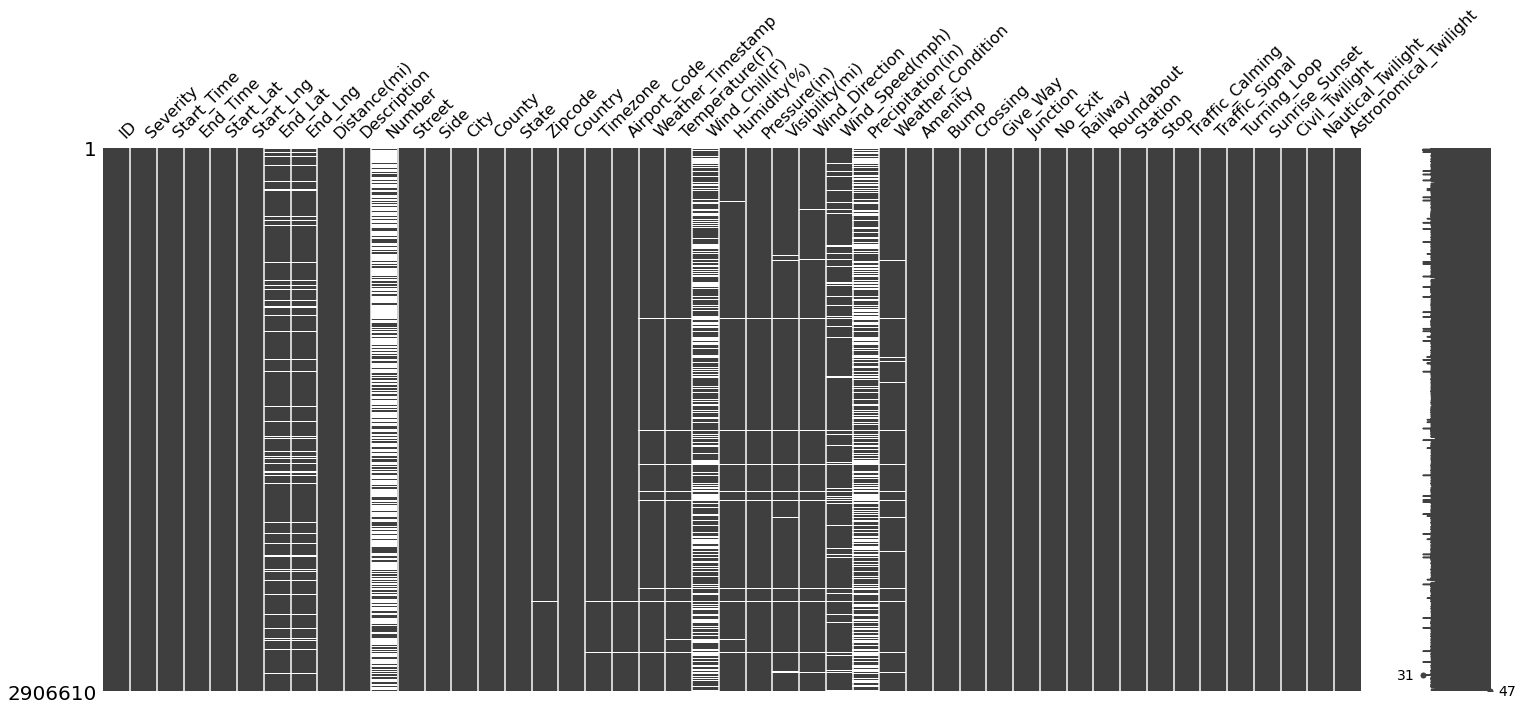

In [8]:
matrix(df_dask.compute())

In [7]:
df=df_dask.drop_duplicates()

In [8]:
df=df.drop(columns=(['Number','Wind_Chill(F)','Precipitation(in)']))

In [9]:
df=df.dropna()

<AxesSubplot:>

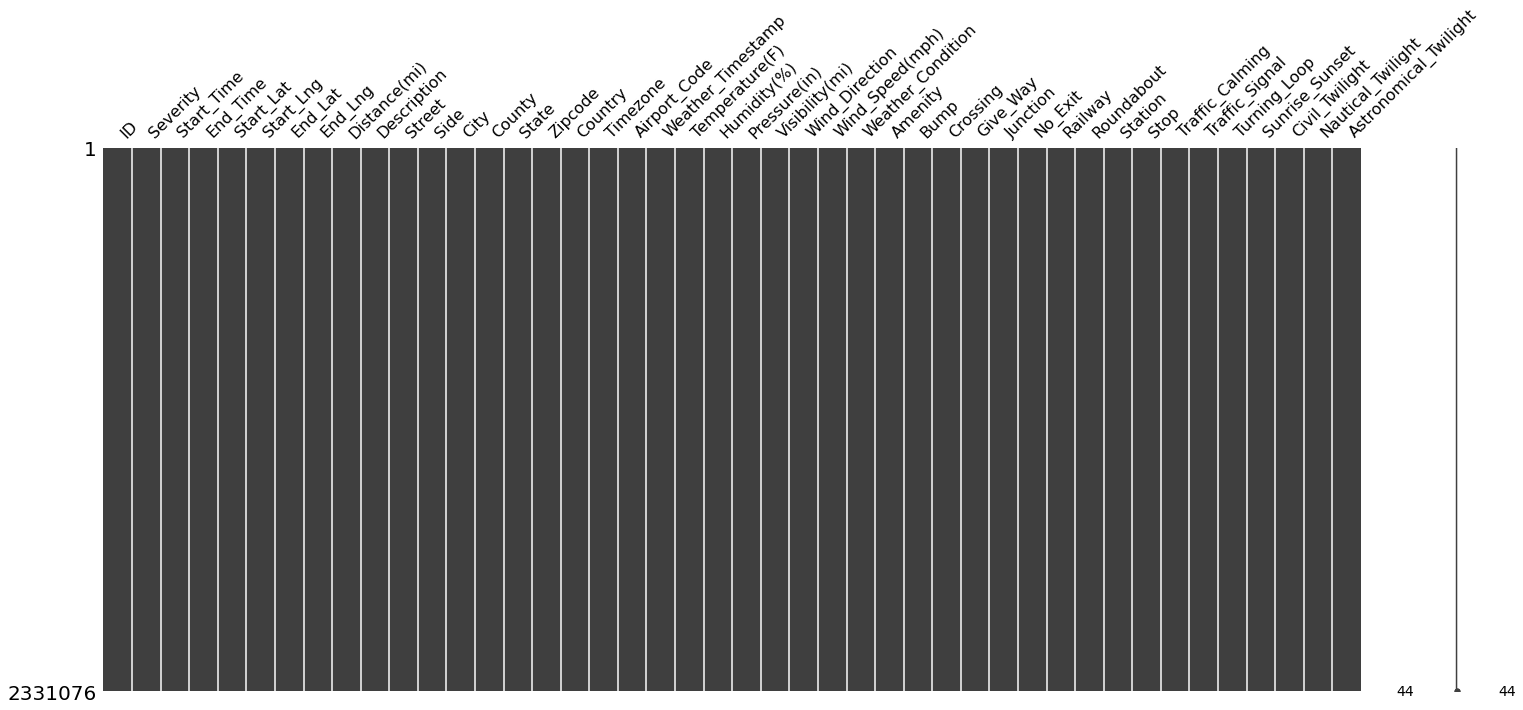

In [11]:
matrix(df.compute())

# Analyze

## Category by period

In [10]:
mp_df=df[['ID','Severity']]

In [11]:
mp_df['Year']=df.Start_Time.dt.year
mp_df['Month']=df.Start_Time.dt.month
mp_df['Day']=df.Start_Time.dt.day

In [12]:
mp_df

,ID,Severity,Year,Month,Day
npartitions=1,,,,,
,object,int64,int64,int64,int64
,...,...,...,...,...


In [13]:
df_panda=mp_df.compute()

In [14]:
df_panda

,ID,Severity,Year,Month,Day
0,A-1,2,2019,5,21
1,A-2,2,2019,10,7
2,A-3,2,2020,12,13
3,A-4,2,2018,4,17
4,A-5,3,2016,8,31
...,...,...,...,...,...
145353,A-2906605,2,2020,10,2
145354,A-2906606,2,2018,6,28
145356,A-2906608,2,2020,11,23
145357,A-2906609,2,2019,12,29


In [15]:
df_panda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331076 entries, 0 to 145358
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   ID        object
 1   Severity  int64 
 2   Year      int64 
 3   Month     int64 
 4   Day       int64 
dtypes: int64(4), object(1)
memory usage: 106.7+ MB


### Total accidents in year
- Number of accidents increase year by year, especilly almost double the accidents of 2019 in 2020. Although 2020 is the year of social distant, it seem there is an interest insight for this increasing.

In [16]:
df_panda.groupby('Year').ID.count().iplot(kind='bar',
                                         colorscale='pastel2',
                                         showgrid=False,
                                         title='TOTAL ACCIDENTS 2016-2020')

- The graph below show that the last quarter of 2020 is where the most accidents happened. Base on this fact and the election of US president happen at the same time. It could be a hypothesis for a correlation but we dont have that data.

In [28]:
df_panda.query('Year==2020').groupby('Month').ID.count().iplot(mode='lines+markers',
                                                                              colorscale='pastel1',
                                                                              showgrid=False,
                                                                              title='No of ACCIDENTS IN 2020 BY MONTH')

### Top 10 Months with accident happened
- During the 4 years period 2016-2020, Top 10 months with the highest accidents are shown below. Suprisingly, 8 out of 10 months are in 2020. The highest record is in Dec 2020.

In [18]:
df_panda.groupby(['Month','Year']).ID.count().nlargest(10).sort_index().iplot(mode='lines+markers',
                                                                              colorscale='pastel2',
                                                                              showgrid=False,
                                                                              title='TOP 10 MONTHS WITH No of ACCIDENTS')

### Top 10 days with accident happened
- With the same 4 years period, the top 10 days with the highest record of accident is plotted. Again, all the records are fall under Dec 2020 with a peak in 24th Dec 2020.

Based on this graph, we could say that 24th Dec 2020 is the most dangerous to go out during 4 years from 2016-2020.

In [19]:
df_panda.groupby(['Day','Month','Year',]).ID.count().nlargest(10).sort_index().iplot(mode='lines+markers',
                                                                                     colorscale='pastel1',
                                                                                     showgrid=False,
                                                                                     title='TOP 10 DAYS WITH No of ACCIDENTS')

### Severity by accidents in year
- The severity went up as following the increasing of accidents during the period, significantly in 2020.
- The level of severity 1 and 4 seem to remain the same during the period
- Opposite to the severity level 3 which was gradually decreasing, the severity level 2 was flying in 2020.

It could be conclude that most of the accidents increase in the US fall into the severity level 2

In [17]:
Year=df_panda.groupby(['Year','Severity']).ID.count().reset_index()

Text(0.5, 1.0, 'SEVERITY BY ACCIDENTS 2016-2020')

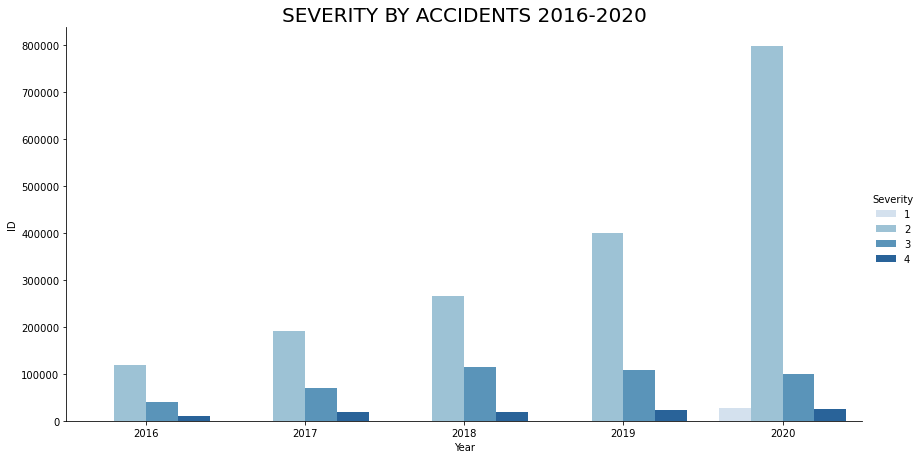

In [19]:
sns.catplot(x='Year', 
            y='ID', 
            hue='Severity', 
            data=Year,
            kind='bar',
            legend=True,
            height=6,
            palette='Blues',
            aspect=2)
plt.title("SEVERITY BY ACCIDENTS 2016-2020",fontdict={"fontsize":20})


### Severity by accidents in month
- When sorting the severity of 4 years period in to months, we see that the lowest accident and severity happen in July.
- After July, the number of accidents and severity increase sharply and peaking at Dec.

It could suggest that the end of the year is the time that accidents are likely to happen due to increasing traffic (holidays) or weather conditions (snow, wind, etc). However, this hypothesis will need further test and analyze.

In [20]:
Month=df_panda.groupby(['Month','Severity']).ID.count().reset_index()

Text(0.5, 1.0, 'SEVERITY BY ACCIDENTS IN MONTH')

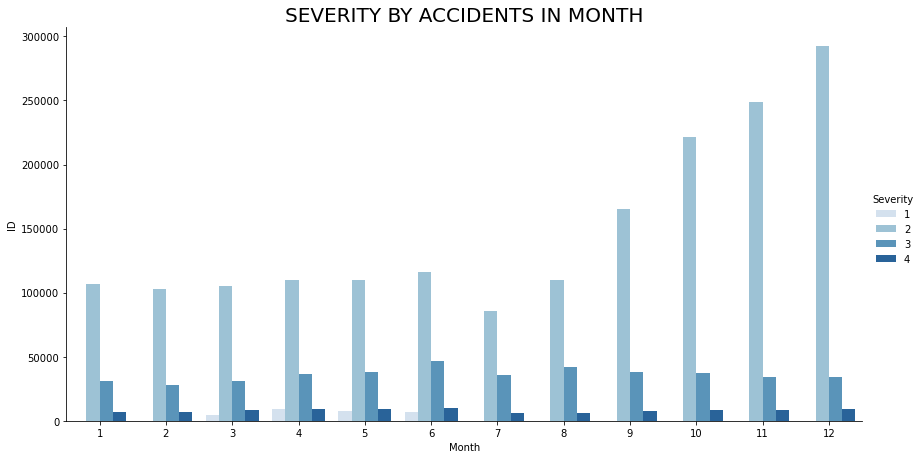

In [21]:
sns.catplot(x='Month', 
            y='ID', 
            hue='Severity', 
            data=Month,
            kind='bar',
            legend=True,
            height=6,
            palette='Blues',
            aspect=2)
plt.title("SEVERITY BY ACCIDENTS IN MONTH",fontdict={"fontsize":20})

### Severity by accidents in day

In [22]:
Day=df_panda.groupby(['Day','Severity']).ID.count().reset_index()

Text(0.5, 1.0, 'SEVERITY BY ACCIDENTS IN DAY')

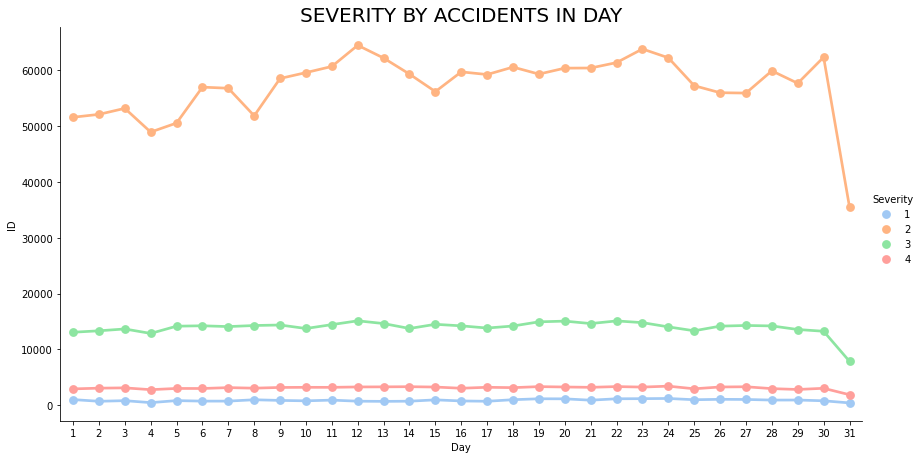

In [23]:
sns.catplot(x='Day', 
            y='ID', 
            hue='Severity', 
            data=Day,
            kind='point',
            legend=True,
            height=6,
            palette='pastel',
            aspect=2)
plt.title("SEVERITY BY ACCIDENTS IN DAY",fontdict={"fontsize":20})